In [5]:
! pip install tensorflow-probability==0.8.0

  Using cached https://files.pythonhosted.org/packages/f8/72/29ef1e5f386b65544d4e7002dfeca1e55b099ed182cd6d405c21a19ae259/tensorflow_probability-0.8.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/24/fb/4f92f8c0f40a0d728b4f3d5ec5ff84353e705d8ff5e3e447620ea98b06bd/cloudpickle-1.1.1-py2.py3-none-any.whl
  Found existing installation: cloudpickle 1.2.2
    Uninstalling cloudpickle-1.2.2:
      Successfully uninstalled cloudpickle-1.2.2
  Found existing installation: tensorflow-probability 0.9.0
    Uninstalling tensorflow-probability-0.9.0:
      Successfully uninstalled tensorflow-probability-0.9.0


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


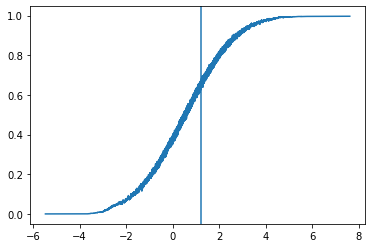

In [6]:
from tensorflow_probability import distributions as tfd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## parametry
mu = 1
sigma = 1
tau = 1
treshold = np.log(2)

## pocet simulaci/zvodniku
N = 10000000

## pro kazdeho zvodnika vygeneruju m_k
ms = tfd.Normal(mu, sigma).sample(N)

## pro kazdeho zavodnika vygeneruju 2 pozorovani, ktere jsem pozoroval
X = tfd.Normal(ms, tau).sample(2)
X_obs_mean = tf.reduce_mean(X, axis = 0).numpy()
X_obs_mean

## pro kazdeho zavodnika vygeneruju 1 nove pozorovani, a zajima me, jestli je vetsi nez zadany limit
X_new = tfd.Normal(ms, tau).sample(1).numpy()
Y = (X_new > treshold).T

## dam dokopy pozorovane prumery tech zavodniku a jestli tretim pozorovanim prekonali limit
data = np.stack([X_obs_mean, Y[..., 0]*1], axis=0).T
data = data[data[:, 0].argsort()]

## jen to hloupe exponencialne vyrovnam (serazene podle pozorvaneho prumeru ze dvou pokusu)
res = np.zeros(len(data[:, 0]))
alpha = 0.0005
p0 = 0
res[0] = p0
for i in range(1, len(Y)):
    res[i] = alpha * data[i, 1] + (1 - alpha) * res[i-1]

## plotujeme
plt.plot(data[:, 0], res)
# x_0 je prumer zadany v prikladu
x_0 = (np.log(3) + np.log(4))/2
plt.axvline(x=x_0)

In [8]:
Y.shape

TensorShape([10000000])

In [ ]:
distr = tfd.Normal(ms, tau)
Y = 1 - distr.cdf(treshold)

## dam dokopy pozorovane prumery tech zavodniku a jestli tretim pozorovanim prekonali limit
data = np.stack([X_obs_mean, Y], axis=0).T
data = data[data[:, 0].argsort()]

## jen to hloupe exponencialne vyrovnam (serazene podle pozorvaneho prumeru ze dvou pokusu)
res = np.zeros(len(data[:, 0]))
alpha = 0.0005
p0 = 0
res[0] = p0
for i in range(1, len(Y)):
    res[i] = alpha * data[i, 1] + (1 - alpha) * res[i-1]

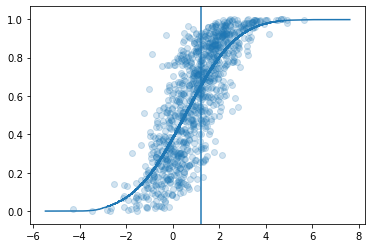

In [12]:
## plotujeme
plt.plot(data[:, 0], res)
plt.scatter(X_obs_mean[:1000], Y[:1000], alpha=0.2)
# x_0 je prumer zadany v prikladu
x_0 = (np.log(3) + np.log(4))/2
plt.axvline(x=x_0)


In [21]:
(np.log(3) + np.log(4) + 1) / 3

1.1616355499293334

In [24]:
distr = tfd.Normal(1.16, np.sqrt(4/ 3))
1 - distr.cdf(np.log(2))

<tf.Tensor: id=218, shape=(), dtype=float64, numpy=0.6570062906491014>